## Desafio_1

Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='1200' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o sitee do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

8. Avançado: Plote uma **regressão múltipla**


In [142]:
#1 Importando as bibliotecas e os dados
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import seaborn as sns
import pandas as pd
from math import e
import numpy as np
import math

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('CAGEDEST_122018.txt', sep=";", encoding='latin-1')
print(data.columns)
data.head()

In [ ]:
#Inferência "O homem ganha mais que a mulher? Se sim quanto"
masc = data2[data2['Sexo'] == 'Masculino']
fem = data2[data2['Sexo'] == 'Feminino']

sal_m = masc['Salário Mensal Log'].mean()
sal_f = fem['Salário Mensal Log'].mean()

dif = e**sal_m - e**sal_f

print('Média do salário dos homens: R${0:.2f} \nMédia do salário das mulheres: R${1:.2f}'\
     .format(e**sal_m, e**sal_f))
print('Em média o homem ganha mais com a mulher, a diferença é de R${0:.2f}'.format(dif))

In [58]:
#1.2 Selecionando as colunas que serão utilizadas na análise
data = data[['Salário Mensal', 'Idade', 'Grau Instrução', 'Sexo', 'Raça Cor', ]]
data3 = data.copy()
data.dtypes #Verificando os tipos das colunas

Salário Mensal    object
Idade              int64
Grau Instrução     int64
Sexo               int64
Raça Cor           int64
dtype: object

In [59]:
#1.3 Transforando as variáveis quantitativas em qualitativas (Sexo, Raça Cor, Grau de Instrução)
data['Sexo'] = data['Sexo'].astype('category')
data['Raça Cor'] = data['Raça Cor'].astype('category')
data['Grau Instrução'] = data['Grau Instrução'].astype('category')

data['Sexo'].cat.categories = (['Masculino', 'Feminino'])
data['Raça Cor'].cat.categories = (['Indigena', 'Branca', 'Preta', 'Amarela', 'Parda', \
                                    'Não identificada'])
data['Grau Instrução'].cat.categories = (['Analfabeto', 'Até 5ª Incompleto', '5ª Completo Fundamental', '6ª a 9ª Fundamental', 'Fundamental Completo', 'Médio Incompleto', 'Médio Completo', 'Superior Incompleto', 'Superior Completo'])

data.head()

,Salário Mensal,Idade,Grau Instrução,Sexo,Raça Cor
0,"000954,00",24,Médio Incompleto,Masculino,Parda
1,"002500,00",25,Superior Incompleto,Masculino,Branca
2,"000000,00",55,Até 5ª Incompleto,Masculino,Parda
3,"000000,00",52,Até 5ª Incompleto,Masculino,Parda
4,"000000,00",32,Até 5ª Incompleto,Masculino,Parda


A porcentagem de valores nulos da variável Salário Mensal é de 1.07%
Ao ignorar os valores nulos as diferença na divisão dos quartis ficou da seguinte forma:
Primeiro quatil 8.00 
Segundo quartil 7.00 
Terceiro quartil 5.00
Portanto é justificalvel ignorar os valores nulos, uma vez que a distribuição é similar


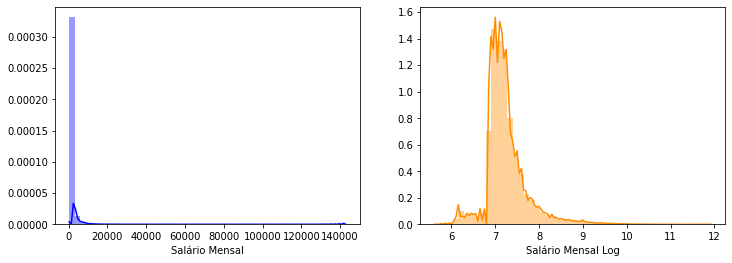

In [60]:
#2 Limpeza e transformação da variável alvo Salário Mensal

data['Salário Mensal'].replace(',', '.', inplace = True, regex=True)
data['Salário Mensal'] = data['Salário Mensal'].astype('float64')

#Contando a quantidade de valores iguais a 0
zeros = data[data['Salário Mensal'] == 0]
pct_zero = (len(zeros)/len(data)) * 100
print("A porcentagem de valores nulos da variável Salário Mensal é de {0:.2f}%"\
      .format(pct_zero))

#Novo datframe sem valors nulos
data2 = data[data['Salário Mensal'] != 0]

Q_um = data2['Salário Mensal'].describe()[4] - data['Salário Mensal'].describe()[4]
Q_dois = data2['Salário Mensal'].describe()[5] - data['Salário Mensal'].describe()[5]
Q_tres = data2['Salário Mensal'].describe()[6] - data['Salário Mensal'].describe()[6]
print("Ao ignorar os valores nulos as diferença na divisão dos quartis ficou da seguinte forma:")
print("Primeiro quatil {0:.2f} \nSegundo quartil {1:.2f} \nTerceiro quartil {2:.2f}"\
      .format(Q_um, Q_dois, Q_tres))
print("Portanto é justificalvel ignorar os valores nulos, uma vez que a distribuição é similar")

#Tamanho e posição dos gráficos
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Plot do histograma
sns.distplot(data2['Salário Mensal'], ax = ax1, color = 'blue');

#Ajustando os valores da coluna 'Salário Mensal', aplicando log
data2['Salário Mensal Log'] = np.log(data2['Salário Mensal'])

#Adicionando o log do salário na df 3
data3['Salário Mensal Log'] = np.log(data2['Salário Mensal'])
data3.dropna(inplace = True)

#Plot histograma log
sns.distplot(data2['Salário Mensal Log'], ax = ax2, color = 'darkorange');

,Idade,Salário Mensal Log
Idade,1.0000,0.2751
Salário Mensal Log,0.2751,1.0000


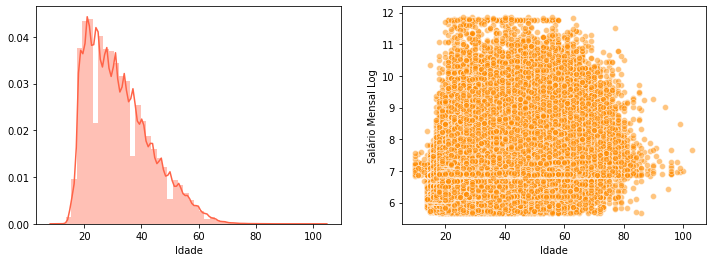

In [61]:
#3 Verificação dos dados da variável Idade

#Tamanho e posição dos gráficos
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Plot do histograma
sns.distplot(data2['Idade'], ax = ax1, color = "tomato");

#Plot da dispersão entre idade e log salário
sns.scatterplot(data2['Idade'], data2['Salário Mensal Log'], ax = ax2, alpha = 0.5, \
                color = 'darkorange');

#Correlação
data3.iloc[:, [1,5]].corr()

A correlação entre as duas variáveis não é significativa, porém é perceptivel que os valores maximos de salário são atingidos até od 60 anos de idade

,Grau Instrução,Salário Mensal Log
Grau Instrução,1.000000,0.261247
Salário Mensal Log,0.261247,1.000000


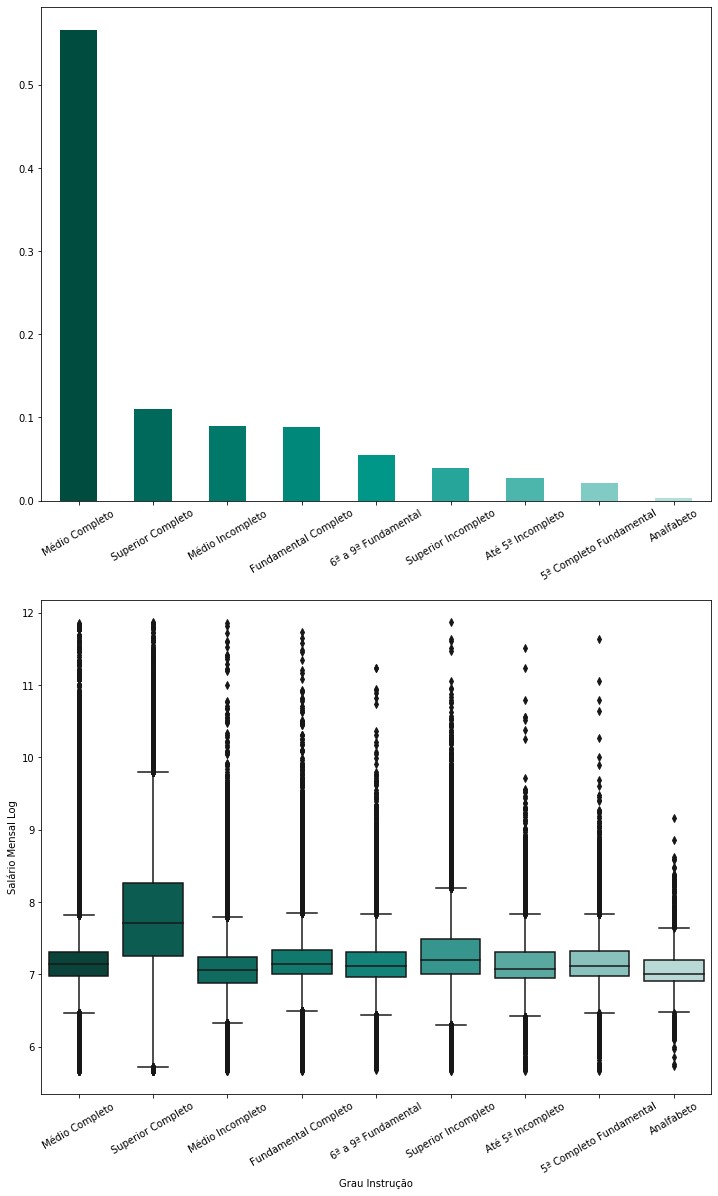

In [62]:
#4 Verificação dos dados da variável Grau de Instrução

#Tamanho e posição dos gráficos
fig = plt.figure(figsize=(12, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#Definindo o palette para usar na plotagem
cores = ['#004d40', '#00695c', '#00796b', '#00897b', '#009688', '#26a69a', '#4db6ac', \
         '#80cbc4', '#b2dfdb']

#Definição das cores do boxplot
sns.set_palette(cores)

#Plot da distribuição do Grau de intrição
data2['Grau Instrução'].value_counts(True).plot(kind = 'bar', color = cores, ax = ax1\
        ).set_xticklabels(rotation=30, labels = data2['Grau Instrução'].value_counts().index);

#Plot da dispersão entre Grau de instrução e log Salário
sns.boxplot('Grau Instrução', 'Salário Mensal Log', data = data2, ax = ax2, order = \
           data2['Grau Instrução'].value_counts().index).set_xticklabels(rotation=30, \
           labels = data2['Grau Instrução'].value_counts().index);

#Fazer correlação
data3.iloc[:, [2,5]].corr()

O salário médio das pessoas cujo grau de ensino é superior completo é o maior e o mais bem disribuido entre todos. Também podemos ver que existe uma assimetria positiva.

,Sexo,Salário Mensal Log
Sexo,1.000000,-0.100297
Salário Mensal Log,-0.100297,1.000000


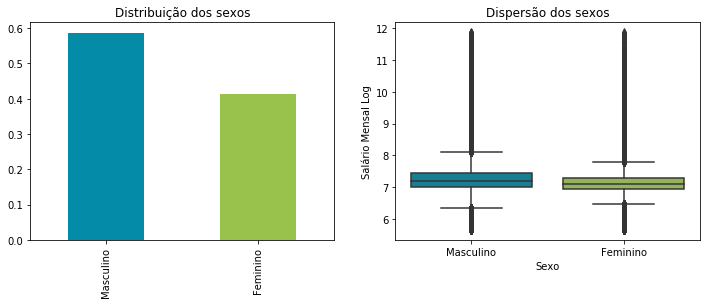

In [63]:
#5 Verificação dos dados da variável Sexo

#Tamanho e posição dos gráficos
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Definindo o palette para usar na plotagem
cores = ['#048BA8', '#99C24D']

#Definição das cores do boxplot
sns.set_palette(cores)

#plot da distribuição
data2['Sexo'].value_counts(True).plot(kind = 'bar', color = ['#048BA8', '#99C24D'], \
                                      title = 'Distribuição dos sexos', ax = ax1);

#plot da dispersão
sns.boxplot('Sexo', 'Salário Mensal Log', data = data2, ax = ax2)\
.set_title('Dispersão dos sexos');

#fazer correlação
display(data3.iloc[:, [3,5]].corr())

In [111]:
#Inferência "O homem ganha mais que a mulher?"
masc = data2[data2['Sexo'] == 'Masculino']
fem = data2[data2['Sexo'] == 'Feminino']

mean_m = masc['Salário Mensal Log'].mean()
mean_f = fem['Salário Mensal Log'].mean()

std_m = masc['Salário Mensal Log'].std()
std_f = fem['Salário Mensal Log'].std()

n_m = len(masc['Salário Mensal Log'])
n_f = len(fem['Salário Mensal Log'])

int_m = st.norm.interval(alpha = 0.99, loc = mean_m, scale = std_m/np.sqrt(n_m))
int_f = st.norm.interval(alpha = 0.99, loc = mean_f, scale = std_f/np.sqrt(n_f))

if int_m[0] > mean_f:
    print('Homem ganha mais que a mulher com 99% de confiança')
else:
    print('Homem não ganha mais que a mulher com 99% de confiança')

Homem ganha mais que a mulher com 99% de confiança


,Raça Cor,Salário Mensal Log
Raça Cor,1.000000,-0.121523
Salário Mensal Log,-0.121523,1.000000


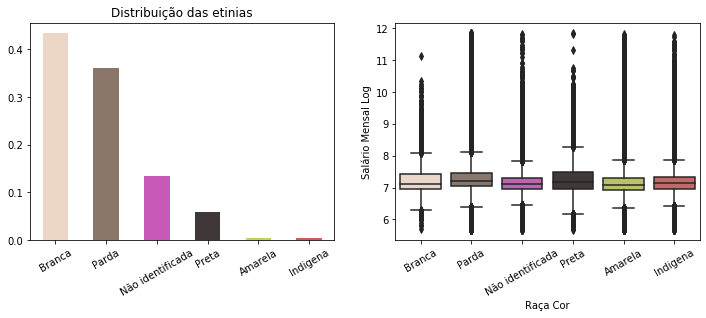

In [101]:
#6 Verificação dos dados da variável Raça Cor

#Tamanho e posição dos gráficos
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Definindo o palette para usar na plotagem
cores = ['#edd6c5', '#8a7769', '#c959b9', '#403838', '#c5d15a', '#d15a5a']

#Definição das cores do boxplot
sns.set_palette(cores)

#Plot da distribuição
data2['Raça Cor'].value_counts(True).plot(kind = 'bar', color = cores, title = \
    'Distribuição das etinias', ax = ax1).set_xticklabels(rotation=30, labels = \
                                        data2['Raça Cor'].value_counts().index);

#Plot da dispersão
sns.boxplot('Raça Cor', 'Salário Mensal Log', data = data2, ax = ax2,)\
.set_xticklabels(rotation=30, labels = data2['Raça Cor'].value_counts().index);

#fazer correlação
display(data3.iloc[:, [4,5]].corr())

In [114]:
#Inferência "Brancos ganham mais?"

branco = data2[data2['Raça Cor'] == 'Branca']
outros = data2[data2['Raça Cor'] != 'Branca']

mean_b = branco['Salário Mensal Log'].mean()
mean_o = outros['Salário Mensal Log'].mean()

std_b = branco['Salário Mensal Log'].std()
std_o = outros['Salário Mensal Log'].std()

n_b = len(branco['Salário Mensal Log'])
n_o = len(outros['Salário Mensal Log'])

int_b = st.norm.interval(alpha = 0.99, loc = mean_b, scale = std_b/np.sqrt(n_b))
int_o = st.norm.interval(alpha = 0.99, loc = mean_o, scale = std_o/np.sqrt(n_o))

if int_b[0] > mean_o:
    print('Brancos ganham mais com 99% de confiança')
else:
    print('Brancos não ganham mais com 99% de confiança')

Brancos ganham mais com 99% de confiança


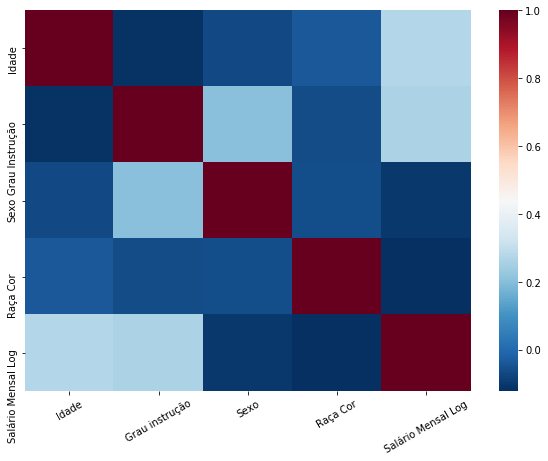

In [140]:
#7 Heatmap
corr = data3.iloc[:, 1:].corr()
plt.figure(figsize=(10, 7))
labels = ['Idade', 'Grau instrução', 'Sexo', 'Raça Cor', 'Salário Mensal Log']
sns.heatmap(corr, cmap="RdBu_r").set_xticklabels(rotation=30, labels = labels);

In [146]:
#8 Regressão multipla

#Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

X = data3.iloc[:, 1:4]
Y = data3.iloc[:, 5]

results = regress(X,Y)
display(results.summary())

k = results.params["const"]
a = results.params["Idade"]
b = results.params["Sexo"]
c = results.params['Grau Instrução']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Salário Mensal Log   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                 1.667e+05
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:29:26   Log-Likelihood:            -1.2808e+06
No. Observations:             2232507   AIC:                         2.562e+06
Df Residuals:                 2232503   BIC:                         2.562e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3539      0.002   3686.254      0.000       6.350       6.357
Idade              0.0131   2.64e-05    496.037      0.000       0.013       0.013
Grau Instrução     0.1002      0.000    524.360      0.000       0.100       0.101
Sexo              -0.1418      0.001   -237.475      0.000      -0.143      -0.141
==============================================================================
Omnibus:                   674200.427   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4330140.539
Skew:                           1.300   Prob(JB):                         0.00
Kurtosis:                       9.308   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""